In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [86]:
# Reading the csv file.

df=pd.read_csv('baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [87]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [88]:
# Checking for columns and data types.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


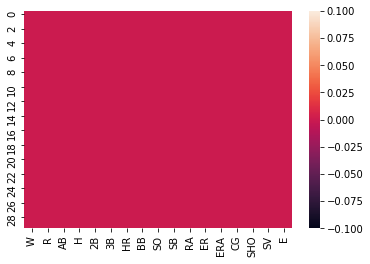

In [89]:
# Checking for null using HeatMap
sns.heatmap(df.isnull())

In [90]:
from scipy.stats import zscore
z= np.abs(zscore(df))
z

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

In [91]:
# Checking for outliers with threshold value of 3
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


There are no outliers with threshold value greater than 3.

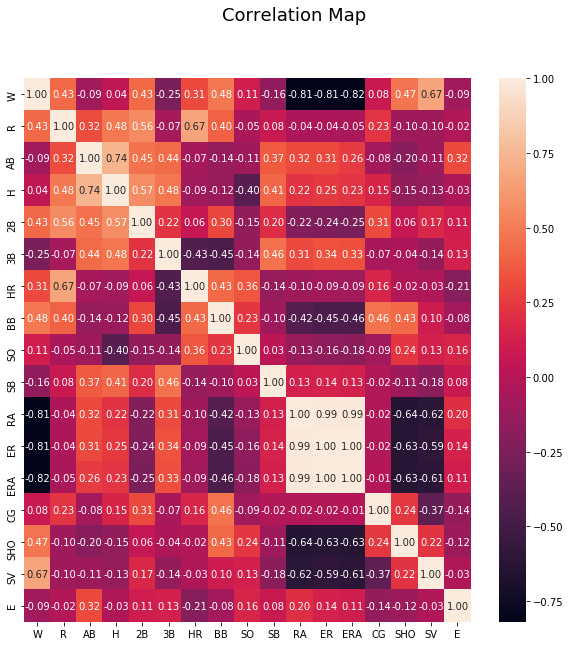

In [92]:
plt.figure(figsize=(10,10)) 
sns.heatmap(df.corr(), annot=True, fmt=".2f") 
plt.suptitle("Correlation Map", fontsize=18)
plt.show()  

Based on the Correlation Map it is clear that :

    Runs(R),Home Runs(HR), BB and Saves(SV) are highly correlated with the chances of Wins(W).

Text(0, 0.5, 'Runs')

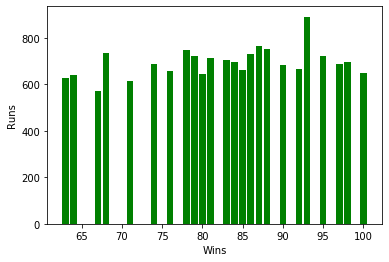

In [93]:
# Checking the relation between the Wins & Runs

plt.bar(df['W'], df['R'], color='g')
plt.xlabel('Wins')
plt.ylabel('Runs')

Text(0, 0.5, 'Runs')

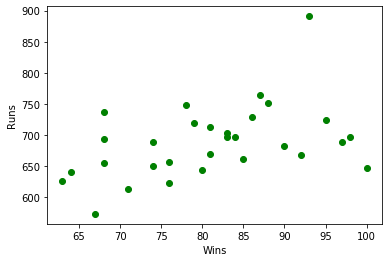

In [94]:
# Checking the relation between the Wins & Runs

plt.scatter(df['W'], df['R'], color='g')
plt.xlabel('Wins')
plt.ylabel('Runs')

Text(0, 0.5, 'Home Runs')

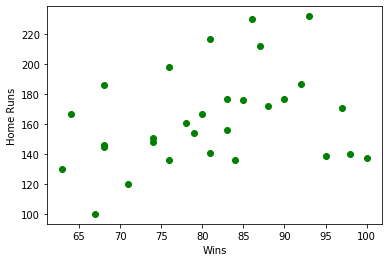

In [95]:
# Checking the relation between the Wins & Home Runs

plt.scatter(df['W'], df['HR'], color='g')
plt.xlabel('Wins')
plt.ylabel('Home Runs')

Text(0, 0.5, 'Saves')

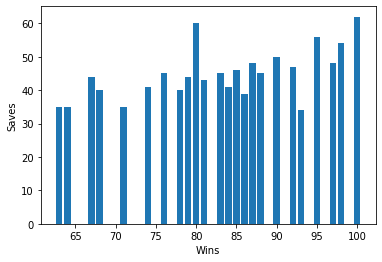

In [96]:
# Checking the relation between the Gender & 

#plt.scatter(df['W'], df['SV'], color='r')
plt.bar(df['W'], df['SV'])
plt.xlabel('Wins')
plt.ylabel('Saves')

In [97]:
# Setting x  by excluding W column which is y here for Wins
x=df.drop(['W'],axis=1)
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [98]:
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#scale = StandardScaler()
scale = MinMaxScaler()
x=scale.fit_transform(x)

In [99]:
# Settting y axis as W column for wins to be predicted
y=df['W']
y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [100]:

max_score=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=r_state)
    lm=LinearRegression()
    lm.fit(train_x,train_y)
    pred=lm.predict(test_x)
    score=lm.score(x,y)
    #print("Score corresponding to r_state: ",r_state," is ",score)
    if(score>max_score):
        max_score=score
        final_rstate=r_state
        
print("\n")
print("Max_accuracy_Score corresponding to final_r_state: ",final_rstate," is ",max_score)



Max_accuracy_Score corresponding to final_r_state:  83  is  0.9289225928504699


In [101]:
# Setting the test x & y values and using the random state from above step which is 83.

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=83)

In [102]:
train_x.shape

(22, 16)

In [103]:
train_y.shape

(22,)

In [104]:
test_x.shape

(8, 16)

In [105]:
test_y.shape

(8,)

In [106]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [107]:
KNN=KNeighborsRegressor(n_neighbors=10)
SV=SVR()
LR=LinearRegression()
DT=DecisionTreeRegressor(random_state=10)
LS = Lasso(alpha=0.001)
RD = Ridge(alpha=0.01)
EL = ElasticNet(alpha=0.001)
RF = RandomForestRegressor(n_estimators=200,random_state=92)
AD = AdaBoostRegressor()
GB = GradientBoostingRegressor()

In [108]:
models=[]
models.append(('KNeighborsRegressor',KNN))
models.append(('SVR',SV))
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DT))
models.append(('Lasso',LS))
models.append(('Ridge',RD))
models.append(('ElasticNet',EL))
models.append(('RandomForestRegressor',RF))
models.append(('AdaBoostRegressor',AD))
models.append(('GradientBoostingRegressor',GB))

In [109]:
Model=[]
score=[]
mae=[]
mse=[]
rmae=[]

for name,model in models:
    print("--------------",name,"--------------")
    Model.append(name)
    model.fit(train_x,train_y)
    print(model)
    pre=model.predict(test_x)
    
    # Metrics
    m1=mean_absolute_error(test_y,pred)
    print("Mean absolute error",m1)
    mae.append(m1)
           
    m2=mean_squared_error(test_y,pred)
    print("Mean squared error",m2)
    mse.append(m2)
    
    
    m3=np.sqrt(mean_squared_error(test_y,pred))
    print("Root Mean absolute error",m3)
    rmae.append(m3)
    
    #Model performance
    modelscore=model.score(test_x,test_y)
    print("Score: ",modelscore )
    score.append(modelscore*100)
    
    print("\n")

-------------- KNeighborsRegressor --------------
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')
Mean absolute error 7.243504664064698
Mean squared error 97.59539087583849
Root Mean absolute error 9.879037952950606
Score:  0.35508850263115965


-------------- SVR --------------
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Mean absolute error 7.243504664064698
Mean squared error 97.59539087583849
Root Mean absolute error 9.879037952950606
Score:  0.05239554431387472


-------------- LinearRegression --------------
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Mean absolute error 7.243504664064698
Mean squared error 97.59539087583849
Root Mean absolute error 9.879037952950606
Score:  0.8498770218159648


------------

In [110]:
result=pd.DataFrame({"Model": Model, "Score": score})
result

,Model,Score
0,KNeighborsRegressor,35.508850
1,SVR,5.239554
2,LinearRegression,84.987702
3,DecisionTreeRegressor,-51.809919
4,Lasso,84.244388
5,Ridge,86.685829
6,ElasticNet,87.013199
7,RandomForestRegressor,18.237828
8,AdaBoostRegressor,25.633346
9,GradientBoostingRegressor,-3.379704


# I choose ElasticNet Modelas it has better accuracy with 87%.

In [111]:
# Saving the prediction data in a file.

predictData=pd.DataFrame(pre)
df.to_csv('Baseball_Predict.csv')
predictData

,0
0,87.660153
1,91.764109
2,85.855535
3,67.159071
4,94.396516
5,70.048272
6,67.791033
7,75.864700


In [112]:
# Saving the model

from sklearn.externals import joblib
joblib.dump(EL,"EL_BaseBall.pkl")

['EL_BaseBall.pkl']